/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

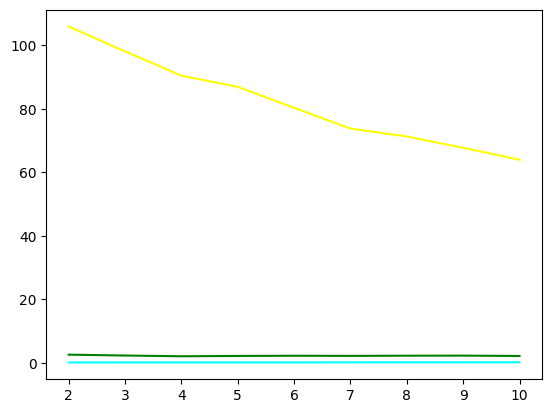

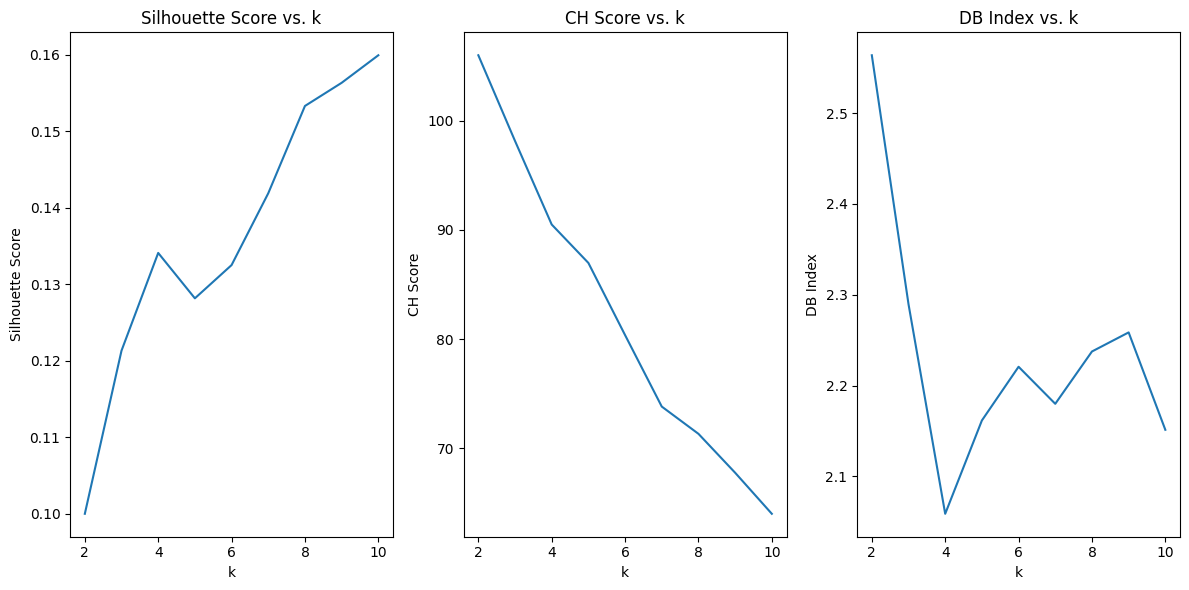

In [18]:
#  Perform k-means clustering for different values of k. Evaluate the above scores for each k value.
# Make a plot of the values against the k value to determine the optimal cluster count.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Loading the dataset
df = pd.read_excel('/content/TRAINING_DATA.xlsx')

# Defining the feature variables (all attributes except the target variable)
X = df.drop(columns=['OUTPUT'])

# Spliting the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Defining the range of k values to test
k_values = range(2, 11)  # test k from 2 to 10

# Initializing lists to store the scores
silhouette_scores = []
ch_scores = []
db_indices = []

# Performing k-means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    labels = kmeans.labels_

    # Calculating the scores
    silhouette = silhouette_score(X_train, labels)
    ch_score = calinski_harabasz_score(X_train, labels)
    db_index = davies_bouldin_score(X_train, labels)

    # Appending the scores to the lists
    silhouette_scores.append(silhouette)
    ch_scores.append(ch_score)
    db_indices.append(db_index)

# Ploting the scores against k values

plt.plot(k_values, silhouette_scores, 'cyan', k_values, ch_scores, 'yellow', k_values, db_indices, 'green')
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores)
plt.title("Silhouette Score vs. k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores)
plt.title("CH Score vs. k")
plt.xlabel("k")
plt.ylabel("CH Score")

plt.subplot(1, 3, 3)
plt.plot(k_values, db_indices)
plt.title("DB Index vs. k")
plt.xlabel("k")
plt.ylabel("DB Index")

plt.tight_layout()
plt.show()